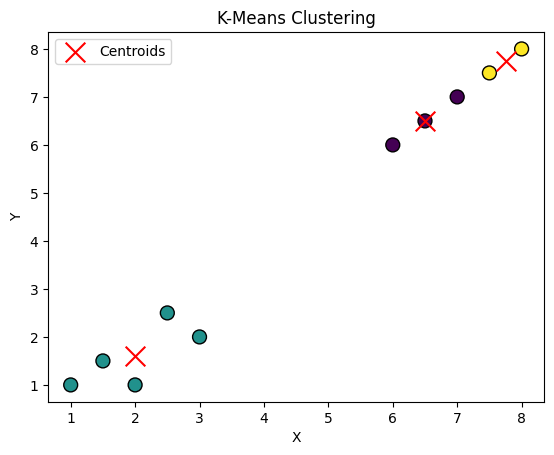

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example dataset (you can replace this with your own dataset)
data = pd.DataFrame({
    'x': [1, 2, 3, 6, 7, 8, 1.5, 6.5, 7.5, 2.5],
    'y': [1, 1, 2, 6, 7, 8, 1.5, 6.5, 7.5, 2.5]
})

# Step 1: Initialize K centroids randomly
def initialize_centroids(X, k):
    np.random.seed(42)  # For reproducibility
    centroids = X[np.random.choice(X.shape[0], size=k, replace=False)]
    return centroids

# Step 2: Assign each point to the closest centroid
def assign_clusters(X, centroids):
    clusters = []
    for point in X:
        distances = np.linalg.norm(point - centroids, axis=1)
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return np.array(clusters)

# Step 3: Recalculate centroids as the mean of all points in each cluster
def update_centroids(X, clusters, k):
    new_centroids = np.array([X[clusters == i].mean(axis=0) for i in range(k)])
    return new_centroids

# Step 4: K-Means Clustering algorithm
def kmeans(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)
    for i in range(max_iters):
        clusters = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, clusters, k)
        
        # Check for convergence (if centroids do not change)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, clusters

# Convert the DataFrame to numpy array for processing
X = data.values

# Perform K-Means Clustering
k = 3  # Number of clusters
centroids, clusters = kmeans(X, k)

# Step 5: Plot the results
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=100)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label="Centroids")
plt.title("K-Means Clustering")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()
